### Application
- A user program built on Spark using its APIs. It consists of a driver program and executors on the cluster.

### SparkSession
- An object that provides a point of entry to interact with underlying Spark functionality and allows programming Spark with its APIs. In an interactive Spark shell, the Spark driver instantiates a SparkSession for you, while in a Spark application, you create a SparkSession object yourself.

### Job
- A parallel computation consisting of multiple tasks that gets spawned in response to a Spark action (e.g., save(), collect()).

### Stage
- Each job gets divided into smaller sets of tasks called stages that depend on each other.

### Task
- A single unit of work or execution that will be sent to a Spark executor.

In [5]:
import findspark
findspark.init()
import pyspark

In [ ]:
from pyspark import SparkContext
sc = SparkContext()

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
sc = spark.sparkContext

## Important Terms

Let's quickly go over some important terms:

Term                   |Definition
----                   |-------
RDD                    |Resilient Distributed Dataset
Transformation         |Spark operation that produces an RDD
Action                 |Spark operation that produces a local object
Spark Job              |Sequence of transformations on data with a final action

## Creating an RDD

There are two ways to create RDDs: <b>parallelizing</b> an existing collection in your driver program, or <b>referencing a dataset</b> in an external storage system, such as a shared filesystem, HDFS, HBase, or any data source offering a Hadoop InputFormat.

Method                      |Result
----------                               |-------
`sc.parallelize(array)`                  |Create RDD of elements of array (or list)
`sc.textFile(path/to/file)`                      |Create RDD of lines from file

In [6]:
data = [1,2,3,4,5]
distDataRDD = sc.parallelize(data)

In [7]:
distDataRDD

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

In [8]:
distDataRDD.collect()

[1, 2, 3, 4, 5]

##### Once created, the distributed dataset (distDataRDD) can be operated on in parallel.

In [9]:
distDataRDD.reduce(lambda a,b: a+b)

15

PySpark can create distributed datasets from any storage source supported by Hadoop, including your local file system, HDFS, Cassandra, HBase, Amazon S3, etc. Spark supports text files, SequenceFiles, and any other Hadoop InputFormat.

In [10]:
%%writefile example.txt
first line
second line
third line
fourth line

Writing example.txt


In [11]:
distFile = sc.textFile('example.txt')

In [12]:
distFile

example.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [13]:
distFile.getNumPartitions()

2

In [14]:
distFile.count()

4

In [15]:
distFile.collect()

['first line', 'second line', 'third line', 'fourth line']

In [17]:
distFile.first()

'first line'

In [18]:
lst = distFile.collect()

In [19]:
lst

['first line', 'second line', 'third line', 'fourth line']

In [20]:
lst[0]

'first line'

In [21]:
secfind = distFile.filter(lambda line:'second' in line)

In [22]:
secfind

PythonRDD[6] at RDD at PythonRDD.scala:53

In [23]:
secfind.collect()

['second line']

In [24]:
thrdfind = distFile.filter(lambda line: 'third' in line)

In [25]:
thrdfind

PythonRDD[7] at RDD at PythonRDD.scala:53

In [26]:
thrdfind.collect()

['third line']

In [27]:
distFile_mapped = distFile.map(lambda s:len(s))

In [28]:
distFile_mapped

PythonRDD[8] at RDD at PythonRDD.scala:53

In [29]:
distFile_mapped.collect()

[10, 11, 10, 11]

In [30]:
distFile_mapped.reduce(lambda a,b : a+b)

42

## RDD Transformations

We can use transformations to create a set of instructions we want to preform on the RDD (before we call an action and actually execute them).

Transformations are the process which are used to create a new RDD. It follows the principle of Lazy Evaluations (the execution will not start until an action is triggered).

Transformation Example                          |Result
----------                               |-------
`filter(lambda x: x % 2 == 0)`           |Discard non-even elements
`map(lambda x: x * 2)`                   |Multiply each RDD element by `2`
`map(lambda x: x.split())`               |Split each string into words
`flatMap(lambda x: x.split())`           |Split each string into words and flatten sequence
`sample(withReplacement=True,0.25)`      |Create sample of 25% of elements with replacement
`union(rdd)`                             |Append `rdd` to existing RDD
`distinct()`                             |Remove duplicates in RDD
`sortBy(lambda x: x, ascending=False)`   |Sort elements in descending order

## RDD Actions

Once you have your 'recipe' of transformations ready, what you will do next is execute them by calling an action.

Actions are the processes which are applied on an RDD to initiate Apache Spark to apply calculation and pass the result back to driver. 

Here are some common actions:

Action                             |Result
----------                             |-------
`collect()`                            |Convert RDD to in-memory list 
`take(3)`                              |First 3 elements of RDD 
`top(3)`                               |Top 3 elements of RDD
`takeSample(withReplacement=True,3)`   |Create sample of 3 elements with replacement
`sum()`                                |Find element sum (assumes numeric elements)
`mean()`                               |Find element mean (assumes numeric elements)
`stdev()`                              |Find element deviation (assumes numeric elements)

In [31]:
%%writefile example2.txt
first 
second line
the third line
then a fourth line

Writing example2.txt


In [32]:
# Show RDD
sc.textFile('example2.txt')

example2.txt MapPartitionsRDD[11] at textFile at NativeMethodAccessorImpl.java:0

In [33]:
# Save a reference to this RDD
text_rdd = sc.textFile('example2.txt')

In [34]:
text_rdd

example2.txt MapPartitionsRDD[13] at textFile at NativeMethodAccessorImpl.java:0

In [35]:
text_rdd.take(2)

['first ', 'second line']

In [36]:
text_rdd.collect()

['first ', 'second line', 'the third line', 'then a fourth line']

### Exercise

Create a file `sample.txt`with. Read and load it into a RDD with the `textFile` spark function.

In [37]:
text_rdd.collect()

['first ', 'second line', 'the third line', 'then a fourth line']

## Transformation
In Spark, the core data structures are immutable meaning they cannot be changed once created. This might seem like a strange concept at first, if you cannot change it, how are you supposed to use it? In order to “change” a DataFrame you will have to instruct Spark how you would like to modify the DataFrame you have into the one that you want. These instructions are called transformations. Transformations are the core of how you will be expressing your business logic using Spark. There are two types of transformations, those that specify narrow dependencies and those that specify wide dependencies.
https://databricks.com/glossary/what-are-transformations 

<b>Narrow transformation — specify narrow dependencies</b>
Narrow transformation are those where each input partition will contribute to only one output partition.
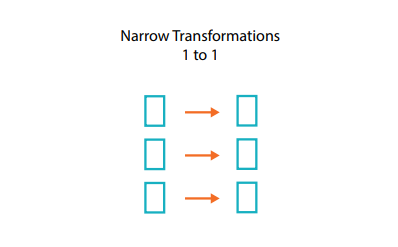

<b>Wide transformation — specify wide dependencies.</b>
Wide transformation will have input partitions contributing to many output partitions.
You will often hear this referred to as a <I><b>shuffle<b></I> where Spark will exchange partitions across the cluster. 
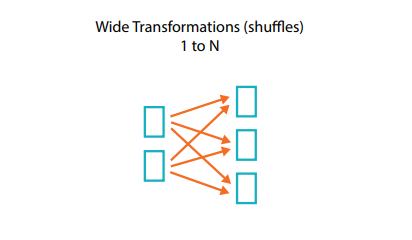

In [41]:
rdd = sc.parallelize(list(range(8)))
print('rdd elements:         ',rdd.collect())

rdd elements:          [0, 1, 2, 3, 4, 5, 6, 7]


In [42]:
rdd_squared = rdd.map(lambda x: x ** 2).collect() # Square each element
print('rdd elements squared: ', rdd_squared)

rdd elements squared:  [0, 1, 4, 9, 16, 25, 36, 49]


In [43]:
def sq(no):
    return no**2

In [44]:
rdd_squared = rdd.map(sq).collect() # Square each element
print('rdd elements squared: ', rdd_squared)

rdd elements squared:  [0, 1, 4, 9, 16, 25, 36, 49]


In [45]:
# Map a function (or lambda expression) to each line
# Then collect the results.
text_rdd.map(lambda line: line.split()).collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

In [46]:
textRddlst = text_rdd.map(lambda line: line.split()).collect()

In [47]:
textRddlst[1]

['second', 'line']

In [48]:
textRddlst[1][0]

'second'

### Exercise

1- Create rdd from list of numbers and apply any built in Math function to it.<br>
2- Apply ant math operation using lambda expression.

## Map vs flatMap

In [49]:
text_rdd.map(lambda line: line.split()).collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

In [50]:
# Map vs flatMap
# Collect everything as a single flat map
text_rdd.flatMap(lambda line: line.split()).collect()

['first',
 'second',
 'line',
 'the',
 'third',
 'line',
 'then',
 'a',
 'fourth',
 'line']

In [51]:
lstFlatMap = text_rdd.flatMap(lambda line: line.split()).collect()

In [52]:
lstFlatMap[8] 

'fourth'

In [53]:
rdd.collect()

[0, 1, 2, 3, 4, 5, 6, 7]

In [54]:
rdd.filter(lambda x : x%2==0).collect()

[0, 2, 4, 6]

In [56]:
rdd = sc.parallelize(['John','Fred','Anna','James','Frank'])
rdd2 = rdd.groupBy(lambda w : w[0])
rdd2.collect()

[('J', <pyspark.resultiterable.ResultIterable at 0x7f2ca5d1c070>),
 ('F', <pyspark.resultiterable.ResultIterable at 0x7f2ca5d8fe50>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x7f2ca5d8feb0>)]

In [57]:
rdd2.first()

('J', <pyspark.resultiterable.ResultIterable at 0x7f2ca5a24880>)

In [58]:
rdd2.first()[1]

In [59]:
list(rdd2.first()[1])

['John', 'James']

In [60]:
rdd2_lst = rdd2.collect()
[(k,list(v)) for (k,v) in rdd2_lst]

[('J', ['John', 'James']), ('F', ['Fred', 'Frank']), ('A', ['Anna'])]

In [61]:
rdd = sc.parallelize([1, 1, 2, 3, 5, 8])
result = rdd.groupBy(lambda x: x % 2).collect()

In [62]:
result

[(0, <pyspark.resultiterable.ResultIterable at 0x7f2ca5db1040>),
 (1, <pyspark.resultiterable.ResultIterable at 0x7f2ca5db1130>)]

In [63]:
sorted([(x, sorted(y)) for (x, y) in result])

[(0, [2, 8]), (1, [1, 1, 3, 5])]

In [69]:
rdd = sc.parallelize([('B',5),('B',4),('A',3),('A',2),('A',1)])
rdd2 = rdd.groupByKey()
rdd2.collect()

[('B', <pyspark.resultiterable.ResultIterable at 0x7f2ca6c83160>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x7f2ca5b106d0>)]

In [73]:
[(j[0], list(j[1])) for j in rdd2.collect()]

[('B', [5, 4]), ('A', [3, 2, 1])]

In [74]:
sorted([(j[0], list(j[1])) for j in rdd2.collect()])

[('A', [3, 2, 1]), ('B', [5, 4])]

In [75]:
sorted([(j[0], sorted(list(j[1]))) for j in rdd2.collect()])

[('A', [1, 2, 3]), ('B', [4, 5])]

In [76]:
rdd1 = sc.parallelize([("a", 1), ("b", 2)])
rdd2 = sc.parallelize([("a", 3), ("a", 4), ("b", 5)])
rdd1.join(rdd2).collect()

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]

In [77]:
rdd = sc.parallelize([1,2,3,3,4,5,10,5,5,5,2,2,2])
rdd.distinct().collect()

[2, 4, 10, 1, 3, 5]

In [79]:
txtrdd_flat = text_rdd.flatMap(lambda line : line.split())

In [80]:
txtrdd_flat.collect()

['first',
 'second',
 'line',
 'the',
 'third',
 'line',
 'then',
 'a',
 'fourth',
 'line']

In [82]:
txtrdd_flat.distinct().collect()

['line', 'third', 'fourth', 'first', 'second', 'the', 'then', 'a']

In [83]:
rdd = sc.parallelize(['John', 'Fred', 'Anna', 'James'])
rdd.keyBy(lambda w: w[0]).collect()

[('J', 'John'), ('F', 'Fred'), ('A', 'Anna'), ('J', 'James')]

## Actions

In [86]:
rdd = sc.parallelize(list(range(8)))

In [87]:
rdd2 = rdd.map(lambda x:x**2)

In [88]:
rdd2.reduce(lambda a,b:a+b) # reduce is an action!

140

In [89]:
from operator import add

In [90]:
rdd2.reduce(add)

140

In [92]:
rdd2.collect()

[0, 1, 4, 9, 16, 25, 36, 49]

In [91]:
# Using actions
print('Max: ',rdd2.max())
print('Min: ',rdd2.min())
print('Sum: ',rdd2.sum())
print('Mean: ',rdd2.mean())
print('Variance: ',rdd2.variance())
print('Stdev: ',rdd2.stdev())

Max:  49
Min:  0
Sum:  140
Mean:  17.5
Variance:  278.25
Stdev:  16.680827317612277


In [93]:
rdd = sc.parallelize([('J', 'James'), ('F','Fred'), 
                    ('A','Anna'), ('J','John')])

In [94]:
rdd.countByKey()

defaultdict(int, {'J': 2, 'F': 1, 'A': 1})

In [95]:
# Stop the local spark cluster
sc.stop()